In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys
from collections import defaultdict

In [57]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [58]:
topo_to_log_file_dict = {
    "B4": ["..\\logs\\demand_pinning_sweep_paths\\2022_6_18_23_32_56_475\\B4_DemandPinning.txt",
       #     "..\\logs\\demand_pinning_sweep_paths\\2022_6_18_23_7_29_879\\B4_DemandPinning.txt"
    ],
    "SWAN": ["..\\logs\\demand_pinning_sweep_paths\\2022_6_18_23_32_56_475\\SWAN_DemandPinning.txt",
       #     "..\\logs\\demand_pinning_sweep_paths\\2022_6_18_23_7_29_879\\SWAN_DemandPinning.txt"
    ],
    "Abilene": ["..\logs\\demand_pinning_sweep_paths\\2022_6_18_23_32_56_475\\Abilene_DemandPinning.txt",
       #     "..\\logs\\demand_pinning_sweep_paths\\2022_6_18_23_7_29_879\\Abilene_DemandPinning.txt"
    ],
}
topo_to_num_links = {
    "B4": 38,
    "SWAN": 24,
    "Abilene": 26
}
topology_to_num_paths_to_gap = defaultdict(dict)

In [59]:
for (topo, log_file_list) in topo_to_log_file_dict.items():
    gap_list = []
    num_path_list = []
    for log_file in log_file_list:
        with open(log_file, "r") as fp:
            link_cap = int(fp.readline())
            for fline in fp.readlines():
                if fline.startswith("#"):
                    continue
                num_paths, thresh, opt, heuristic, gap = fline.split(",")
                gap = float(gap)
                num_paths = int(num_paths)
                norm_gap = gap * 100 / (topo_to_num_links[topo] * link_cap)
                num_path_list.append(num_paths)
                gap_list.append(norm_gap)
    num_path_list = np.array(num_path_list)
    gap_list = np.array(gap_list)
    sorted_args = np.argsort(num_path_list)
    topology_to_num_paths_to_gap[topo] = (num_path_list[sorted_args], gap_list[sorted_args])

In [60]:
topology_to_num_paths_to_gap

defaultdict(dict,
            {'B4': (array([1, 2, 3, 4, 5, 6]),
              array([22.76315789, 22.7631579 , 22.63157895, 18.15789474, 12.89473684,
                      3.15789474])),
             'SWAN': (array([1, 2, 3, 4, 5, 6]),
              array([8.54166667, 8.54166667, 8.33333335, 8.54166668, 8.54166668,
                     5.41666667])),
             'Abilene': (array([1, 2, 3, 4, 5, 6]),
              array([21.92307692, 21.92307693, 21.92307696, 21.92307693, 21.92307693,
                     21.92307696]))})

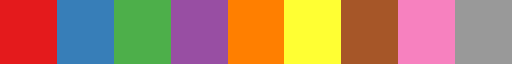

In [61]:
color_pallette = plt.get_cmap("Set1")
color_pallette

In [62]:
# colors = [color_pallette(3), color_pallette(0), color_pallette(4), color_pallette(2)]
# colors = [color_pallette(1), color_pallette(2), color_pallette(3), color_pallette(4)]
# colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(0), color_pallette(4)]
colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(4)]
line_styles = ["--", "--", "--", "--"]

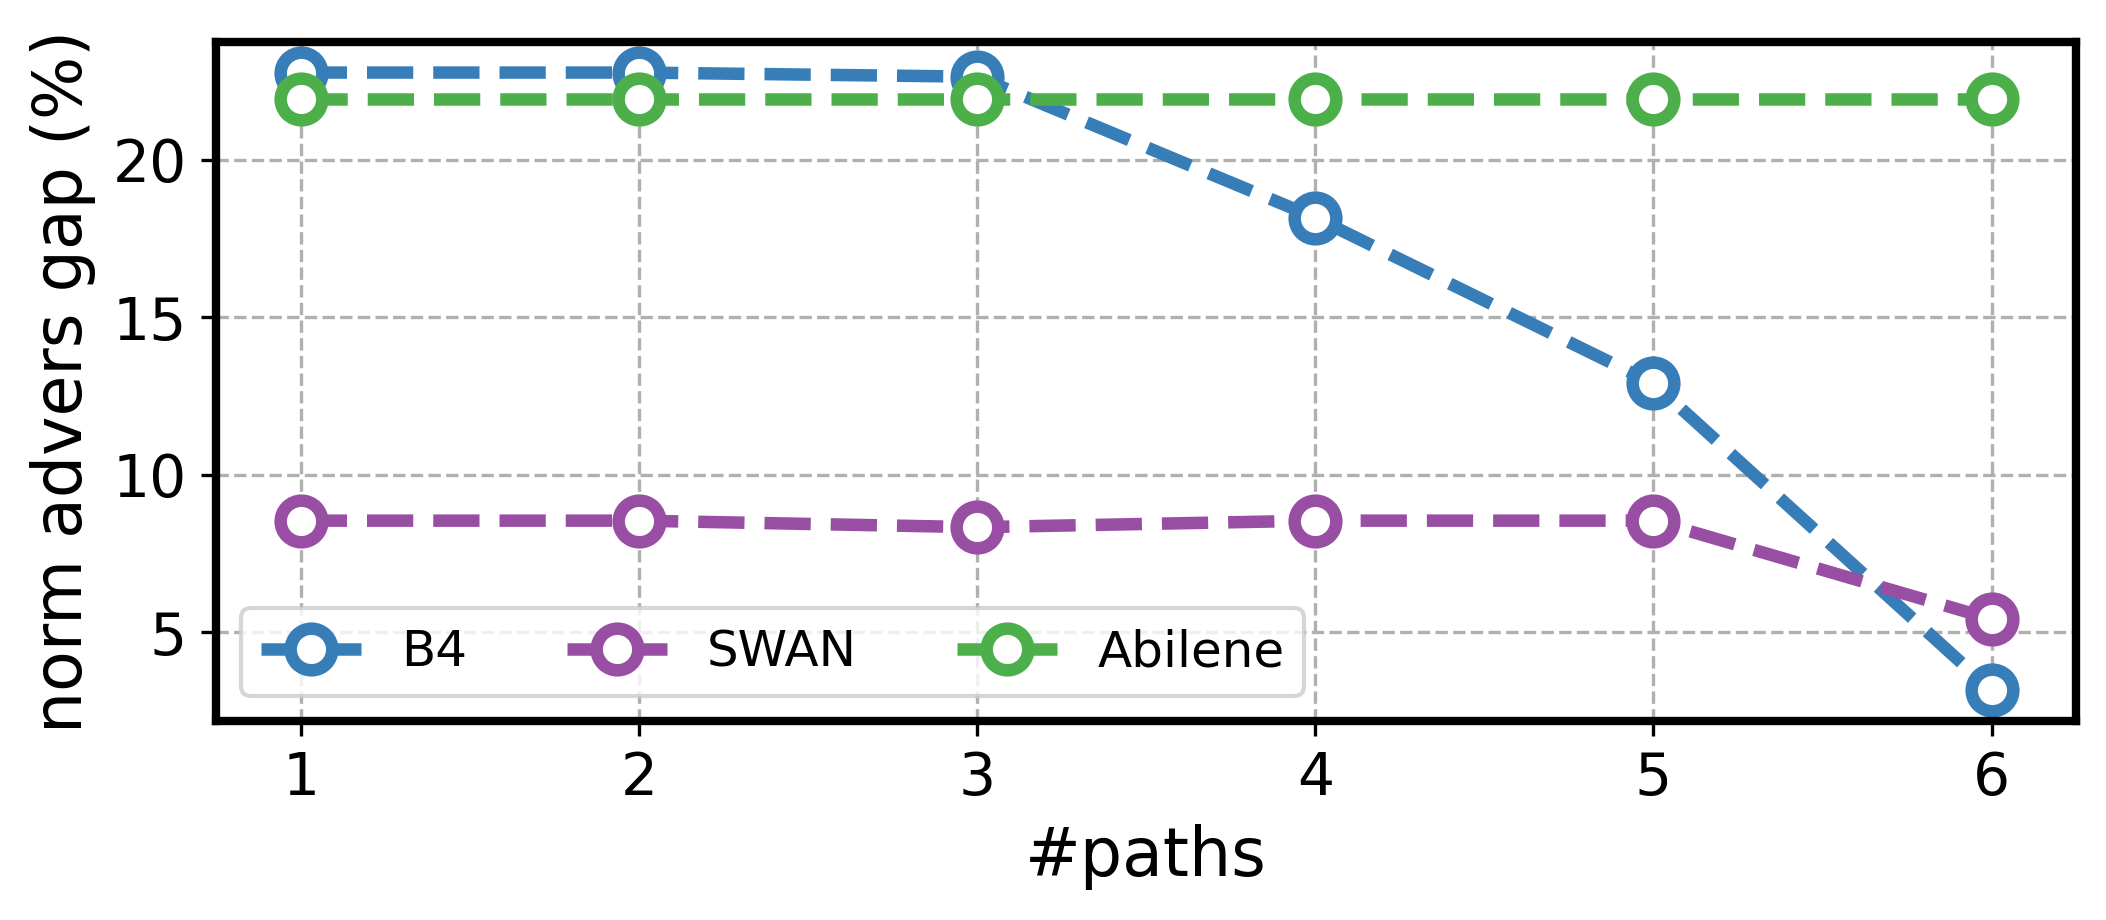

In [63]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
for idx, (topo_name, output) in enumerate(topology_to_num_paths_to_gap.items()):
    plt.plot(output[0], output[1], label=f"{topo_name}", 
             color=colors[idx], 
             linestyle=line_styles[idx], 
             marker="o", 
             mfc="white", 
             mec=colors[idx], 
             markersize=10, 
             linewidth=3, 
             markeredgewidth=3
    )

plt.legend(fontsize=12, loc="best", ncol=3)
plt.xlabel("#paths", fontsize=16)
plt.ylabel("norm advers gap (%)", fontsize=16)
# plt.xscale('log')
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([1, 2, 3, 4, 5, 6], fontsize=14)
plt.grid(which="major", zorder=-1, linestyle="--")
plt.savefig(output_fig_dir + "demandpinning_sweep_paths.jpg", bbox_inches="tight", format="jpg", dpi=300)
plt.savefig(output_fig_dir + "demandpinning_sweep_paths.pdf", bbox_inches="tight", format="pdf", dpi=300)